# 0. Import libraries

In [ ]:
import pandas as pd
from pandas.core.missing import clean_reindex_fill_method
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

import string
import nltk
from nltk.util import ngrams
import re
from nltk.corpus import wordnet as wn

#from langdetect import detect
!pip install langdetect

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier

from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from wordcloud import WordCloud

from collections import Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. Load data

In [ ]:
# merging 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/18_projekt_końcowy/01_Data/twitter-sentiment-analysis.csv'
#path = './twitter-sentiment-analysis.csv'

In [ ]:
df_columns=['group','id','date','flag','user_name','text']
df_encoding = "ISO-8859-1"
df = pd.read_csv(path, encoding=df_encoding, names=df_columns)
df.head(5)

,group,id,date,flag,user_name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


#2. EOD

In [ ]:
# changing original date format to date time

df['datetime'] = pd.to_datetime(df['date'])

/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


KeyboardInterrupt: ignored

In [ ]:
# changing date and time to date only

df['date_column'] = pd.to_datetime(df['datetime']).dt.date

# grouping tweets by day

df.groupby(['date_column']).count().sort_values(by='date_column', ascending=False)

In [ ]:
# checking max and min of tweets date and time range

print(min(df['datetime']))
print(max(df['datetime']))

In [ ]:
# counting unique elements of flag columns

df['flag'].unique()

In [ ]:
#counting unique user names

print(len(df['user_name'].unique()))

# searching for the most active user

df.groupby(['user_name']).count().sort_values(by='id', ascending=False)

In [ ]:
# checking unique values of group column

uniqueValues2 = df['group'].unique()
print(uniqueValues2)

In [ ]:
#replacing 4 with 1 for positive values in group column

df['group'] = df['group'].replace(4,1)

uniqueValues3 = df['group'].unique()
print(uniqueValues3)

In [ ]:
# checking the number of rows in the dataset

len(df)

In [ ]:
# checking the shape of the dataset

df.shape

In [ ]:
# checking df into for non-null values anf data types

df.info()

In [ ]:
# counting positive and negative tweets in group column

df['group'].value_counts()

# dataset is balanced

In [ ]:
# plotting hisotogram of group distribution

# df.plot.bar('group')

In [ ]:
# checking if columns contain null values

df.isnull().sum()

In [ ]:
# function for counting unique words in the whole dataset

def unique_elements(df, col_name, tokenized=False):
    elements = []
    df_copied = df.copy()
    df_copied.reset_index(drop=True, inplace=True)
    
    for i in range(df_copied.shape[0]):
        if tokenized==False:
            elements = elements + [word for word in df_copied.loc[i, col_name].split()]
        else:
            elements = elements + df_copied.loc[i, col_name]
    return len(list(set(elements)))

In [ ]:
# counting the number of unique words

unique_elements(df=df, col_name='text')

In [ ]:
# counting the number of unique words for groups: positive and negative

unique_elements(df['group'], col_name='text')

In [ ]:
# sprawdzić rozkład długości tweetów w każdej z grup: poz i neg
neg_df = df[df['group']==0]
poz_df = df[df['group']==1]

In [ ]:
unique_elements(neg_df['group'], col_name='text')

In [ ]:
unique_elements(poz_df['group'], col_name='text')

In [ ]:
# sprawdzić jakie słowa dominują w każdej z grup, stworzyć trigramy, unigramy i bigramy. Jakie słowa (i grupy słów) jak często pojawiają się najczęściej w każdej z grup? Które słowa odróżniają od siebie grupy?

#3. Data preparation

##Language detection

In [ ]:
# loop for detenting languages in the 

# napisać
languages = []
for index in df['text_no_numbers']:
    language = detect(text)
    languages.append(language)

df['language'] = languages

print(df)

In [ ]:
# to test 

df = df[df["language"]== "en"]
df.reset_index(drop=True, inplace=True)
df.shape

##Delete urls, numbers, punctuation from tweets

In [ ]:
df = df[['group', 'text']]

In [ ]:
df.head()

,group,text
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t..."
1,0,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# converting all tweets to lower case

df['text']=df['text'].str.lower()
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

### urls

In [ ]:
def remove_urls(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

df['text_no_url'] = df['text'].apply(lambda x: remove_urls(x))
df

,group,text,text_no_url
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...


### numbers

In [ ]:
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)

df['text_no_numbers'] = df['text_no_url'].apply(lambda x: remove_numbers(x))
df

,group,text,text_no_url,text_no_numbers
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."
...,...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time!!! tu...


### user name

In [ ]:
# delete user name before deleting punctuation
def remove_usernames(data):
    return re.sub('@\w+', '', data)

df['text_no_usernames'] = df['text_no_numbers'].apply(lambda x: remove_usernames(x))
df

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...
...,...,...,...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up having no school is the best feel...
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time tupac...


### punctuation

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# function for removing punctuation

def remove_punctuation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned

df['text_no_punct'] = df['text_no_usernames'].apply(lambda x: remove_punctuation(x))
df.head()

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...


##Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenizer(text):
    #Delete Big letters
    lower_text = text.lower()
    #Tokenize
    tokenized_text = nltk.word_tokenize(lower_text)
    return tokenized_text

df['text_tokenized'] = df['text_no_punct'].apply(lambda x: tokenizer(x))
df

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct,text_tokenized
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...,"[s, a, bummer, you, shoulda, got, david, carr,..."
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...,"[i, dived, many, times, for, the, ball, manage..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...,"[no, its, not, behaving, at, all, im, mad, why..."
...,...,...,...,...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ..."
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, very, cool, to, hear, old, walt, i..."
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t..."


### stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords

df['text_without_stopwords'] = df['text_tokenized'].apply(lambda x: remove_stopwords(x))
df

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct,text_tokenized,text_without_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...,"[s, a, bummer, you, shoulda, got, david, carr,...","[bummer, shoulda, got, david, carr, third, day]"
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]"
...,...,...,...,...,...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[woke, school, best, feeling, ever]"
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, very, cool, to, hear, old, walt, i...","[thewdbcom, cool, hear, old, walt, interviews,..."
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[ready, mojo, makeover, ask, details]"
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[happy, th, birthday, boo, alll, time, tupac, ..."


In [ ]:
# df = df.drop(['text_without_stopwords'], axis=1)

In [ ]:
df.head()

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct,text_tokenized,text_without_stopwords
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...,"[s, a, bummer, you, shoulda, got, david, carr,...","[bummer, shoulda, got, david, carr, third, day]"
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might..."
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]"


### short words


In [ ]:
def remove_short_tokens(text):
    without_short_tokens = [word for word in text if len(word) > 2]
    return without_short_tokens

df['text_without_short'] = df['text_without_stopwords'].apply(lambda x: remove_short_tokens(x))
df

,group,text,text_no_url,text_no_numbers,text_no_usernames,text_no_punct,text_tokenized,text_without_stopwords,text_without_short
0,0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",@switchfoot s a bummer. you shoulda got davi...,@switchfoot s a bummer. you shoulda got davi...,s a bummer. you shoulda got david carr of t...,s a bummer you shoulda got david carr of th...,"[s, a, bummer, you, shoulda, got, david, carr,...","[bummer, shoulda, got, david, carr, third, day]","[bummer, shoulda, got, david, carr, third, day]"
1,0,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he can't update his facebook by ...,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb...","[upset, cant, update, facebook, texting, might...","[upset, cant, update, facebook, texting, might..."
2,0,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,@kenichan i dived many times for the ball. man...,i dived many times for the ball. managed to s...,i dived many times for the ball managed to sa...,"[i, dived, many, times, for, the, ball, manage...","[dived, many, times, ball, managed, save, rest...","[dived, many, times, ball, managed, save, rest..."
3,0,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its...","[whole, body, feels, itchy, like, fire]","[whole, body, feels, itchy, like, fire]"
4,0,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all....","no, it's not behaving at all. i'm mad. why am...",no its not behaving at all im mad why am i he...,"[no, its, not, behaving, at, all, im, mad, why...","[behaving, im, mad, cant, see]","[behaving, mad, cant, see]"
...,...,...,...,...,...,...,...,...,...
1599995,4,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up. having no school is the best fee...,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ...","[woke, school, best, feeling, ever]","[woke, school, best, feeling, ever]"
1599996,4,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdb.com - very cool to hear old walt interv...,thewdbcom very cool to hear old walt intervie...,"[thewdbcom, very, cool, to, hear, old, walt, i...","[thewdbcom, cool, hear, old, walt, interviews,...","[thewdbcom, cool, hear, old, walt, interviews]"
1599997,4,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover? ask me f...,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a...","[ready, mojo, makeover, ask, details]","[ready, mojo, makeover, ask, details]"
1599998,4,happy 38th birthday to my boo of alll time!!! ...,happy 38th birthday to my boo of alll time!!! ...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time!!! tu...,happy th birthday to my boo of alll time tupac...,"[happy, th, birthday, to, my, boo, of, alll, t...","[happy, th, birthday, boo, alll, time, tupac, ...","[happy, birthday, boo, alll, time, tupac, amar..."


### stemming

In [ ]:
stemmer = nltk.PorterStemmer()

In [ ]:
stemmer.stem('studing')

'stude'

In [ ]:
def stemming(text):
    stemwords = [stemmer.stem(word) for word in text]
    return stemwords

df['stemmed_text'] = df['text_without_short'].apply(lambda x: stemming(x))
df

In [ ]:
#unique_elements(df=df, col_name='stemmed_text', tokenized=True)

In [ ]:
#unique_elements(df=df, col_name='text_tokenized', tokenized=True)

## N-grams

In [ ]:
text_list = df[['lemmatized_text']].values

In [ ]:
print(text_list[0][0])

In [ ]:
# text_list = text_list[0][0]

In [ ]:
print(text_list)

In [ ]:
n = 1
unigrams = ngrams(text_list, n)

for item in unigrams:
    print(item)

unigrams.head()

In [ ]:
from nltk import ngrams

sentence = 'Hi! How are you doing today?'
n = 2
bigrams = ngrams(sentence.split(), 2)

for grams in bigrams:
    print(grams)

In [ ]:
def generate_ngrams(text, n):
    
    ngrams_list = list(ngrams(df['text'], n))  
    return [' '.join(gram) for gram in ngrams_list]  

df['unigrams'] = text.apply(lambda x: generate_ngrams(x, 1))
df

In [ ]:
n = 2
bigrams = ngrams(text_list, n)

for item in bigrams:
    print(item)

In [ ]:
n = 3
trigrams = ngrams(text_list, n)

for item in trigrams:
    print(item)

In [ ]:
# sprawdzam rozkład długości tweetów w każdej z grup

#Pipeline

In [ ]:
df = df[['group', 'text']]
df

In [ ]:
class RemoveUrlTrasformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_urls(x))
        return X_

class RemoveNumbersTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_numbers(x))
        return X_

class RemoveUserNamesTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_usernames(x))
        return X_

class RemovePunctuationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_punctuation(x))
        return X_

class TokenizationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: tokenizer(x))
        return X_

class RemoveStopWordsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_stopwords(x))
        return X_

class RemoveShortTokensTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_short_tokens(x))
        return X_

class StemmingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: stemming(x))
        return X_

pipe = Pipeline(
    [('remove_urls', RemoveUrlTrasformer(text_column='text')),
    ('remove_numbers', RemoveNumbersTransformer(text_column='text')),
    ('remove_usernames', RemoveUserNamesTransformer(text_column='text')),
    ('remove_punctuation', RemovePunctuationTransformer(text_column='text')),
    ('tokenization', TokenizationTransformer(text_column='text')),
    ('remove_stop_words', RemoveStopWordsTransformer(text_column='text')),
    ('remove_short_tokens', RemoveShortTokensTransformer(text_column='text')),
    ('stemming', StemmingTransformer(text_column='text'))])

df = df[['text', 'group']].copy()
df
pipe.fit(df)

pipe.transform(df)

NameError: ignored

# Train test split

In [ ]:
# train test split

y = df['group']
X = df[['text']]

In [ ]:
X, y = df[['text']].copy(), df['group'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [ ]:
X_train.count()

# Grid Search

# 4. Vectorizer

In [ ]:
class Return_String_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: ' '.join(x))
        X_ = pd.Series(X_[self.text_column])
        return X_

In [ ]:
display(X_train)

nlp_pipeline = Pipeline(steps=[
    ('remove_urls', RemoveUrlTrasformer(text_column='text')),
    ('remove_numbers', RemoveNumbersTransformer(text_column='text')),
    ('remove_usernames', RemoveUserNamesTransformer(text_column='text')),
    ('remove_punctuation', RemovePunctuationTransformer(text_column='text')),
    ('tokenization', TokenizationTransformer(text_column='text')),
    ('remove_stop_words', RemoveStopWordsTransformer(text_column='text')),
    ('remove_short_tokens', RemoveShortTokensTransformer(text_column='text')),
    ('stemming', StemmingTransformer(text_column='text')),
    ('return_string', Return_String_Transformer('text'))
])

nlp_pipeline.fit_transform(X_train)

# TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer_pipeline = Pipeline(steps=[
    ('tokenizer', TokenizationTransformer(text_column='text')),
    ('return_string', Return_String_Transformer('text')),
    ('tfidf_vectorizer', TfidfVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1, 3)))
])

X_train_transformed = tfidf_vectorizer_pipeline.fit_transform(X_train)
X_train_transformed

In [ ]:
# Assuming you have your data and labels as X and y

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'min_samples_split': [2, 5, 10],  # Example values for min_samples_split
    'criterion': ['gini', 'entropy']  # Example values for criterion
}

# Create a model instance
model = DecisionTreeClassifier()

# Create the GridSearchCV instance
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')

# Fit the data to perform the grid search
grid_search.fit(X, y)

# Access the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Access the best model
best_model = grid_search.best_estimator_

# Model

## Decision tree

In [ ]:
baseline_classifier = Pipeline(steps=[
    ('tokenizer', TokenizationTransformer(text_column='text')),
    ('return_string', Return_String_Transformer(text_column='text')),
    ('tfidf_vectorizer', CountVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1, 3))),
    ('logistic_regression', DecisionTreeClassifier())
])

baseline_classifier.fit(X_train, y_train)

baseline_predictions = baseline_classifier.predict(X_test)

# zmiana na accuaracy
print(f'Accuracy-score: {accuracy(y_test, baseline_predictions)}')

# macierz omyłek
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
plot_confusion_matrix(y_test, baseline_predictions)

In [ ]:
pipe = Pipeline(
    [('tokenization', TokenizationTransformer(text_column='text')),
    ('return_string', Return_String_Transformer('text')),
    ('count_vectorizer', CountVectorizer(min_df=0.01, max_df=0.5,
                                         ngram_range=(1,2))),
    ('tree', DecisionTreeClassifier())
    ])
pipe.fit(X_train, y_train)
preds2 = pipe.predict(X_train)

## Random forest

In [ ]:
param_grid = {'forrest__max_depth': [4,6,20], 'forrest__min_samples_split': [5,6,20]}

pipe = Pipeline(
    [('tokenization', TokenizationTransformer(text_column='text')),
    ('return_string', Return_String_Transformer('text')),
    ('count_vectorizer', CountVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1,2))),
    ('forrest', RandomForestClassifier())
    ])

# pipe.fit(X_train, y_train)

ClassifierGridSearch=GridSearchCV(pipe, cv=5, param_grid=param_grid, scoring='f1')
ClassifierGridSearch.fit(X_train, y_train)
the_best_model = ClassifierGridSearch.best_estimator_
baseline_predictions = the_best_model.predict(X_test)
print(f'F1-score: {f1_score(y_test, baseline_predictions)}')

In [ ]:
# embeddingi - stworzyć 2-3 wymiary embeddingów. Zwizualizować np. 10 najważniejszych słów, sprawdzić jakie słowa będą daleko od siebie (bierzemy pod uwagę najczęściej pojawiające się i najbardziej informatywne słowa)

In [ ]:
#class_svm = svm.SVC(kernel='linear')

# Embeddings

In [ ]:
X=df.text
y=df.group

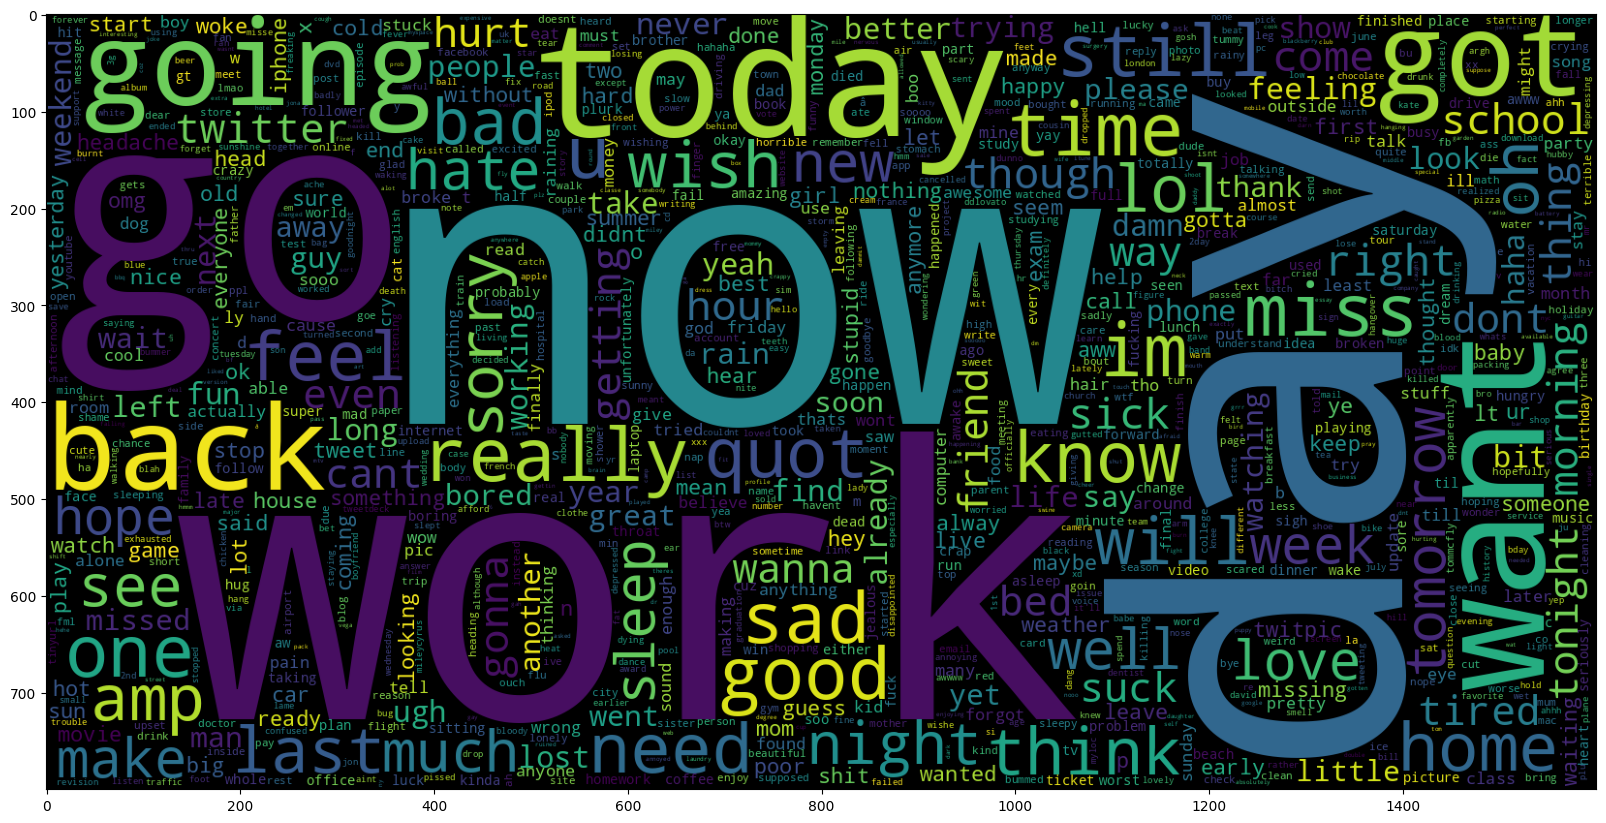

In [ ]:
data_neg = df['text'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

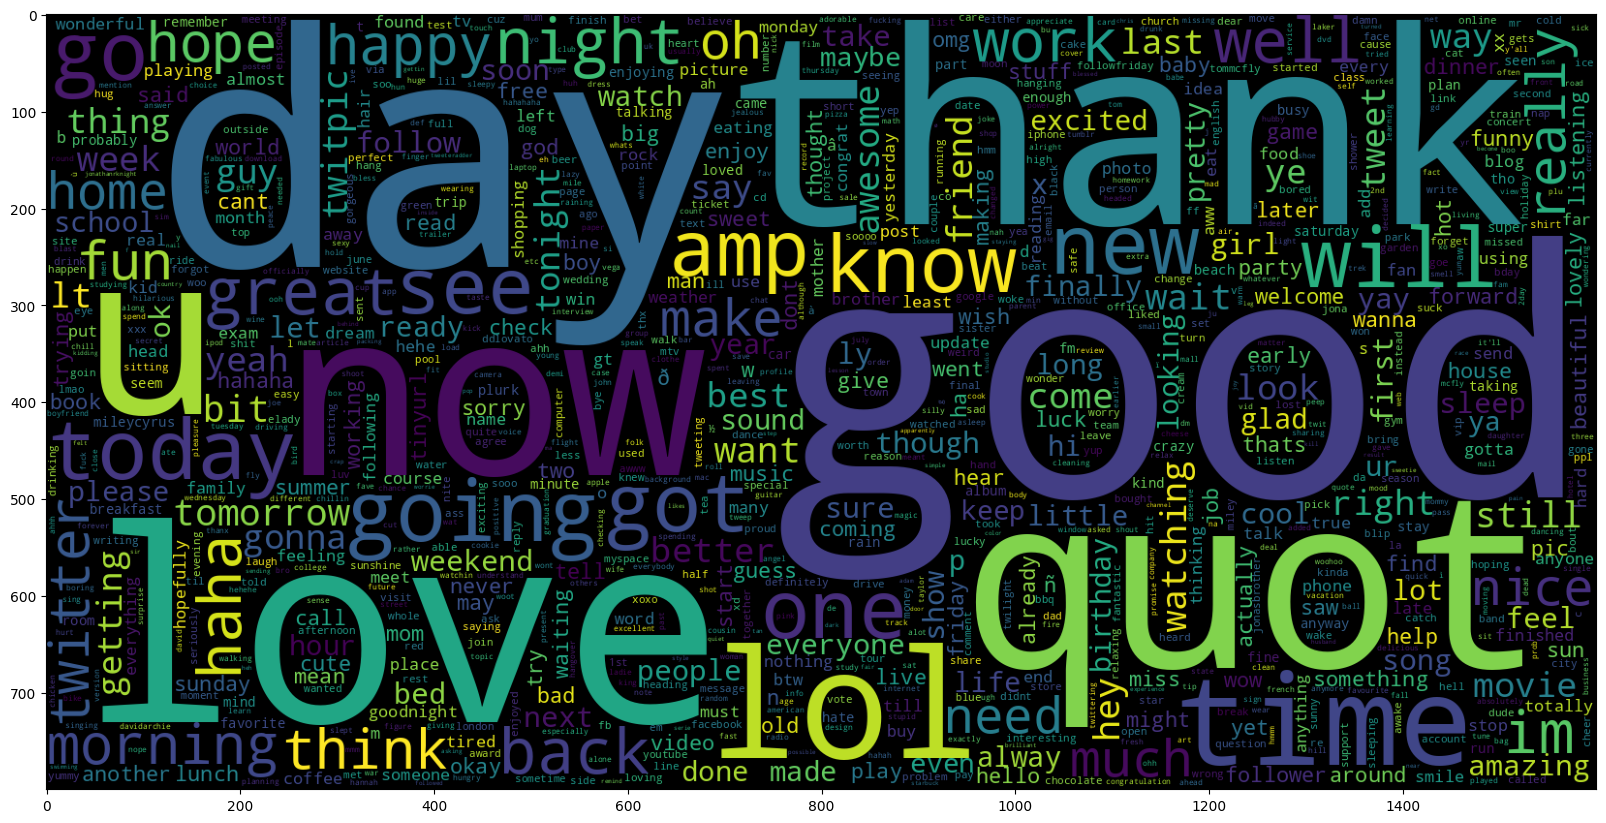

In [ ]:
data_pos = df['text'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
df['count_of_words']=[len(text.split()) for text in df['text']]
df['count_of_words']

0          19
1          21
2          18
3          10
4          21
           ..
1599995    11
1599996    11
1599997    11
1599998    12
1599999     5
Name: count_of_words, Length: 1600000, dtype: int64

In [ ]:
df['text'].head()

0    @switchfoot http://twitpic.com/2y1zl - awww, t...
1    is upset that he can't update his facebook by ...
2    @kenichan i dived many times for the ball. man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object

In [ ]:
group_neg = df['group']==0
group_pos = df['group']==1

In [ ]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))

sns.countplot(x=df[group_pos]['count_of_words'],label='Positive',ax=ax[0])
sns.countplot(x=df[group_neg]['count_of_words'],label='Negative',ax=ax[1])
ax[0].set_title('Number of words for positive comments')
ax[1].set_title('Number of words for negative comments')
plt.tight_layout()
plt.show()

In [ ]:
top_pos = Counter([word for text in df[group_pos]['Words'] for word in text])
top_pos_df=pd.DataFrame(top_pos.most_common(100),columns=['Words','Counts'])

top_neg = Counter([word for text in df[group_neg]['Words'] for word in text])
top_neg_df=pd.DataFrame(top_neg.most_common(100),columns=['Words','Counts'])

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,7.5))
sns.barplot(y='Words',x='Counts',data=top_pos_df[:20],color='deepskyblue',ax=ax[0])
sns.barplot(y='Words',x='Counts',data=top_neg_df[:20],color='coral',ax=ax[1])
ax[0].set_title("Most Frequent words in Positive tweets")
ax[1].set_title("Most Frequent words in Negative tweets")
plt.show()